# Implemeting SVM from scratch using Python

1. Refrence
	* [Youtube Link : MIT OpenCourseWare](https://www.youtube.com/watch?v=_PwhiWxHK8o&t=1983s)

2. About SVM (General required for algo)
	* For all xi in training Data:
		 * ```	
		 	xi.w + b <= -1   if yi = -1 (belongs to -ve class)
		 	xi.w + b >= +1	if yi = +1 (belongs to +ve class)
		 				or
		 	 	__yi(xi.w+b) >= 1__
		 	```
	* for all support vectors(SV) (data points which decides margin)
		* ```
			xi.w+b = -1    here xi is -ve SV and yi is -1
			xi.w+b = +1    here xi is +ve SV and yi is +1
			```
	* For decision Boundary `yi(xi.w+b)=0` here xi belongs to point in decision boundary
	* Our Objective is to maximize Width W
		* `W = ((X+ - X-).w)/|w|`
		* or we can say minimize |w|
	* Once we have found optimized w and b using algorithm
		* `x.w+b = 1` is line passing through +ve support vectors
		* `x.w+b = -1` is line passing through -ve support vectors
		* `x.w+b = 0` is decision boundary
	* It is not necessary that support vector lines always pass through support vectors
	* It is a Convex Optimization problem and will always lead to a global minimum
	* This is Linear SVM means kernel is linear

3. Algorithm in Code (See code for better understanding)
	1. Start with random big value of w say(w0,w0) we will decrease it later
	2. Select step size as `w0*0.1` 
	3. A small value of b, we will increase it later
		* b will range from (-b0 < b < +b0, step = `step*b_multiple`)
		* This is also computational expensive. So select b0 wisely 
	4. We will check for points xi in dataset:
		* Check will for all transformation of w like (w0,w0), (-w0,w0), (w0,-w0), (-w0,-w0)
		* if not `yi(xi.w+b)>=1` for all points then break
		* Else find |w| and put it in dictionary as key and (w,b) as values 
	5. 
		* If w<=0 then current step have been completed and go to step 6
		* Else decrease w as (w0-step,w0-step) and continue with step 3
	6.  Do this step until step becomes `w0*0.001` because futher it will be point of expense
		* `step = step*0.1` 
		* go to step 3
	7. Select (w,b) which has min |w| form the dictionary 

##**References**

* [http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf](http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf)

* [https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

* [https://towardsdatascience.com/support-vector-machine-formulation-and-derivation-b146ce89f28](https://towardsdatascience.com/support-vector-machine-formulation-and-derivation-b146ce89f28)

##**Pegasos Algorithm** 

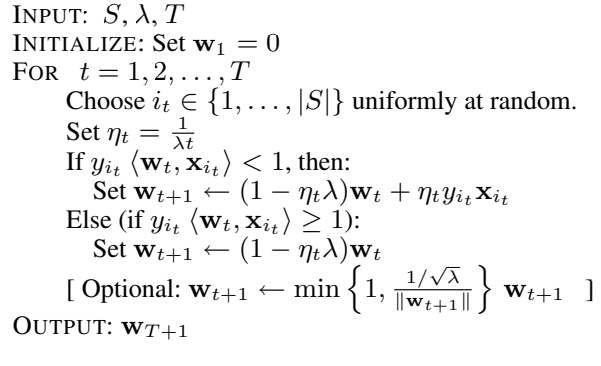

##**Cost Function and Gradient Updates**
<hr/>

In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is `hinge loss`.

[<img src="https://miro.medium.com/max/1104/1*hHlytjVk6d7O2WWvG2Gdig.png" width="40%"/>](https://miro.medium.com/max/1104/1*hHlytjVk6d7O2WWvG2Gdig.png)

The `cost is 0` if the predicted value and the actual value are of the same sign. If they are not, we then calculate the loss value. We also add a 
`regularization parameter` the cost function. The objective of the regularization parameter is to balance the margin maximization and loss. After adding the regularization parameter, the cost functions looks as below.

[<img src="https://miro.medium.com/max/1400/1*GQAd28bK8LKOL2kOOFY-tg.png" width="40%"/>](https://miro.medium.com/max/1400/1*GQAd28bK8LKOL2kOOFY-tg.png)

---
  
  Another way to represent 

---
<br/>

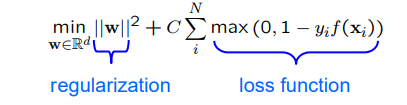

Now that we have the loss function, we take partial derivatives with respect to the weights to find the gradients. Using the gradients, we can update our weights.

[<img src="https://miro.medium.com/max/1400/1*WUphtYLfTOAoaXQXvImBeA.png" width="50%"/>](https://miro.medium.com/max/1400/1*WUphtYLfTOAoaXQXvImBeA.png)

When there is `no misclassification`, i.e our model correctly predicts the class of our data point, we only have to update the gradient from the regularization parameter.

[<img src="https://miro.medium.com/max/616/1*-nKEXrWos8Iuf-DWSv_srQ.png" width="40%"/>](https://miro.medium.com/max/616/1*-nKEXrWos8Iuf-DWSv_srQ.png)

When there is a `misclassification`, i.e our model make a mistake on the prediction of the class of our data point, we include the loss along with the regularization parameter to perform gradient update.

[<img src="https://miro.medium.com/max/856/1*tnvMhAKaTUCO43diEvtTAQ.png" width="40%"/>](https://miro.medium.com/max/856/1*tnvMhAKaTUCO43diEvtTAQ.png)

In [0]:
## Import Package

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


`%matplotlib inline` is an example of a predefined magic function in Ipython. They are frequently used in interactive environments like jupyter notebook. %matplotlib inline makes your plot outputs appear and be stored within the notebook.


In [0]:
%matplotlib inline

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
import pandas as pd

df_feature = pd.DataFrame(cancer.data , columns = cancer.feature_names)
df_feature.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [0]:
cancer.target_names


array(['malignant', 'benign'], dtype='<U9')

In [0]:
from sklearn.model_selection import train_test_split

X = df_feature
y = cancer.target

X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size = 0.25, random_state=101) 

### Standardization data 

[<img src = "https://i.stack.imgur.com/Z7ATR.png"/>](https://i.stack.imgur.com/Z7ATR.png)

StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have `mean = 0` and `standard deviation = 1`.



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Mean = %0.2f' % (np.mean(X_train)))
print('Standard deviation = %0.2f' % (np.std(X_train)))

Mean = 0.00
Standard deviation = 1.00


In [0]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [0]:
X_test.shape, y_test.shape

((143, 30), (143,))

##**C is a regularization parameter** :

It control the cost of the misclassification on the training data

* small C allows constraints to be easily ignored → large margin (`High bias and low Variance i.e Underfitting`)
* large C makes constraints hard to ignore → narrow margin (`Low bias and High Variance i.e Overfitting`)

* C = ∞ enforces all constraints: hard margin

In case of 
  
* High gamma : leads High bias and low variance i.e Underfitting
* low gamma: Low bias and High Variance i.e Overfitting


In [0]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [0]:
clf.score(X_test, y_test)

0.9790209790209791

### Cross validation with `cv = 5` number of folds

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv = 5, scoring='f1_macro')
scores

array([0.94222973, 0.92382225, 0.97158288, 0.91474865, 0.95327876])

In [0]:
prediction = clf.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print('Confusion Matrix : \n{}'.format(confusion_matrix(y_test,prediction)))
print('\n')
print('Classification report : \n{}'.format(classification_report(y_test,prediction)))

Confusion Matrix : 
[[55  0]
 [ 3 85]]


Classification report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.97      0.98        88

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## `GridSearchCV` 
instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of best parameter values are evaluated 

In [0]:
## See the parameters

svm.SVC?


In [0]:
m = svm.SVC()

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {  
                
                'C': [0.1,1,10,100,1000] , 
                'kernel':('linear', 'rbf'),
                'gamma':[1,0.1,0.01,0.001,0.0001]
 
              }

grid = GridSearchCV(m,param_grid,verbose=3)

grid.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.930, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.976, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.965, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.930, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.976, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [79]:
grid.best_score_

0.9766073871409029

In [80]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
## now using grid predict we predict the X_test

grid_predictions = grid.predict(X_test)
print('Confusion Matrix : \n{}'.format(confusion_matrix(y_test,grid_predictions)))
print('\n')
print('Classification report : \n{}'.format(classification_report(y_test,grid_predictions)))

Confusion Matrix : 
[[54  1]
 [ 0 88]]


Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

